# Car Pricing Investigations...

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cars = pd.read_csv('imports-85.data',header=None,names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [99]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<strong>Data Preparation</strong>

In [100]:
cars['normalized_losses'].replace({'?':np.nan},inplace=True)
cars['normalized_losses'] = cars['normalized_losses'].astype(float)

In [101]:
cars['peak_rpm'].replace({'?':np.nan},inplace=True)
cars['peak_rpm'] = cars['peak_rpm'].astype(float)

In [102]:
cars['horsepower'].replace({'?':np.nan},inplace=True)
cars['horsepower'] = cars['horsepower'].astype(float)

In [103]:
cars['num_cylinders'].value_counts()
cars['num_cylinders'].replace({'four':4,'five':5,'six':6,'eight':8,'two':2,'twelve':12,'three':3},inplace=True)
cars['num_cylinders'] = cars['num_cylinders'].astype(int)

In [104]:
cars['price'].value_counts()
cars['price'].replace({'?':np.nan},inplace=True)
cars['price'] = cars['price'].astype(float)

In [105]:
#remove the remaining objects
cars = cars.select_dtypes(exclude='object').copy()
#get rid of the symboling too as it's non-continuous...
cars.drop(columns=['symboling'],inplace=True)

In [106]:
#find missing values...
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
num_cylinders        205 non-null int64
engine_size          205 non-null int64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(9), int64(5)
memory usage: 22.5 KB


In [107]:
cars.shape[0]-cars.count()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
num_cylinders         0
engine_size           0
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [108]:
#remove price nans
cars.dropna(axis=0,subset=['price'],inplace=True)
cars.shape[0]-cars.count()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
num_cylinders         0
engine_size           0
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [109]:
#replace the other values with the means...
cars = cars.fillna(cars.mean())
cars.shape[0]-cars.count()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_cylinders        0
engine_size          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [110]:
car_prices = cars['price'].copy()
cars.drop(columns=['price'],inplace=True)

In [111]:
#normalize 
norm_cars = (cars-cars.mean())/cars.std()
norm_cars.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,-0.342804,0.075201,-0.290709,0.203476,-0.245942,-0.650624,-0.540937
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,-0.342804,0.075201,-0.290709,0.203476,-0.245942,-0.650624,-0.540937
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,1.544965,0.604724,-0.290709,1.354267,-0.245942,-0.961995,-0.687669
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.342804,-0.430252,-0.041019,-0.037387,0.799836,-0.183569,-0.100741
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.601081,0.219617,-0.540399,0.310527,0.799836,-1.117680,-1.274597


In [112]:
#put price back...
norm_cars['price'] = car_prices
#randomize the dataframe
norm_cars = norm_cars.iloc[np.random.permutation(norm_cars.shape[0])]

<strong>Model Building: Univariate</strong>

In [142]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

def knn_train_test(train_col,tar_col,df,k=5):
    """KNearest Neighbour pipeline,
    train_col = the training column names
    tar_col = the test column
    df = the randomized dataframe
    k = the number of neighbours"""
    # split the model 70% train / 30% test
    ind = math.floor(df.shape[0]*.7)
    traindf = df.iloc[:ind].copy()
    testdf = df.iloc[ind:].copy()
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(traindf[train_col],traindf[[tar_col]])
    pred = knn.predict(testdf[train_col])
    return np.sqrt(mean_squared_error(pred,testdf[tar_col]))

In [149]:
colz = norm_cars.columns[:-1]
rms = {}
for i in colz:
    rms[i] = np.round(knn_train_test([i],'price',norm_cars),2)

sorted_rms = sorted(rms.items(), key=lambda kv: kv[1])  
for i in sorted_rms:
    print(i)

('engine_size', 3398.53)
('horsepower', 3944.41)
('city_mpg', 3966.61)
('curb_weight', 4672.29)
('width', 4680.1)
('highway_mpg', 5331.46)
('length', 5462.79)
('wheel_base', 5615.96)
('compression_ratio', 6276.34)
('num_cylinders', 6476.05)
('normalized_losses', 6635.71)
('peak_rpm', 8003.88)
('height', 8095.64)


Engine Size appears to be the best indicator of price

In [139]:
k_vals = [1, 3, 5, 7, 9]

#test each column for various k values
univardf = pd.DataFrame()
for i in colz:
    rmse_scores = []
    for k in k_vals:
        rmse_scores.append(np.round(knn_train_test(i,'price',norm_cars,k),2))
    univardf[i] = rmse_scores
    
univardf['k_vals']=k_vals
univardf.set_index('k_vals',inplace=True)

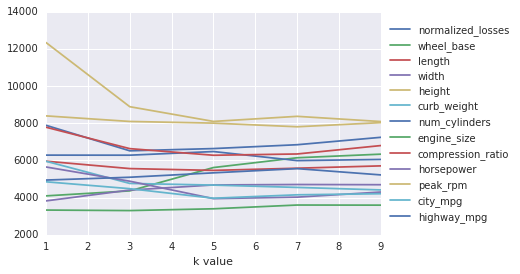

In [140]:
fig = plt.Figure(figsize=(15,10))
for i in list(univardf.columns):
    univardf[i].plot(label=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('k value')
plt.show()

MultiVariate

In [143]:
np.round(knn_train_test(['engine_size','horsepower'],'price',norm_cars),2)

3052.76

In [144]:
np.round(knn_train_test(['engine_size','horsepower','city_mpg'],'price',norm_cars),2)

3089.55

In [150]:
np.round(knn_train_test(['engine_size','horsepower','city_mpg','curb_weight'],'price',norm_cars),2)

3205.99

In [151]:
np.round(knn_train_test(['engine_size','horsepower','city_mpg','curb_weight','width'],'price',norm_cars),2)

3507.66

In [152]:
cols = ['engine_size','horsepower','city_mpg','curb_weight']

matrix = {}

for i in range(2,5):
    results = {}
    for ks in range(1,26):
            results[ks] = np.round(knn_train_test(cols[:i],'price',norm_cars,ks),2)
    matrix[i] = results

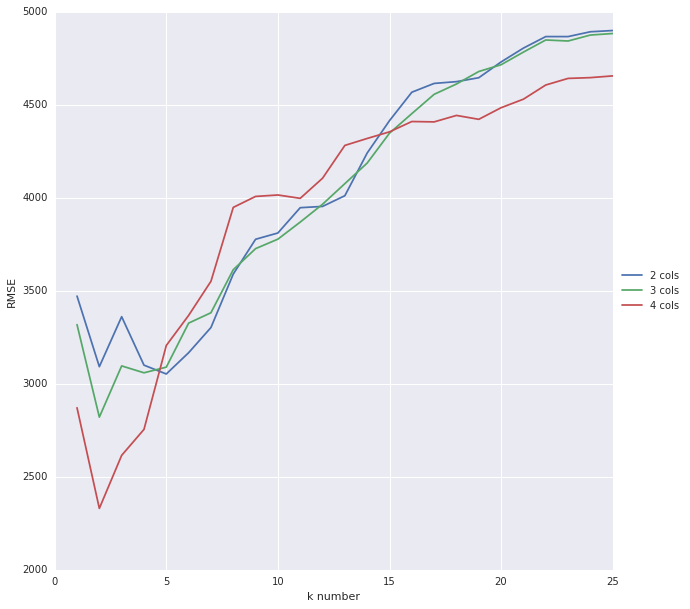

In [159]:
fig = plt.figure(figsize=(10,10))
for p in range(2,5):
    fit = matrix[p]
    plt.plot(list(fit.keys()),list(fit.values()),label=str(p)+' cols')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('k number')
plt.ylabel('RMSE')
plt.show()

In general lower k values appear to be more effective. 